# Лаба 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy, scipy.fftpack, scipy.signal

In [2]:
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['pcolor.shading'] = 'gouraud'

# Сгенерируем сигнал

Text(0.5, 0, 'Время, сек')

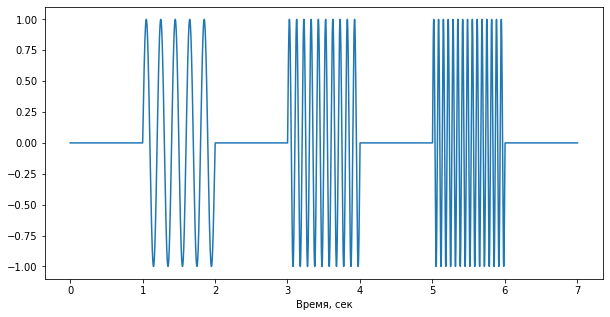

In [124]:
fsample = 1000
N = 1000 
t = np.arange(0,n*7+1)/fs
t1 = t[:n]
hz = np.linspace(0,fs/2,n*7//2+1)
sin_freqs = (5, 10, 15)
signal1 = np.concatenate((np.zeros(n), np.sin(2 * np.pi * sin_freqs[0] * t1), 
                          np.zeros(n), np.sin(2 * np.pi * sin_freqs[1] * t1), 
                          np.zeros(n), np.sin(2 * np.pi * sin_freqs[2] * t1), 
                          np.zeros(n+1)))
plt.plot(t, signal1)
plt.xlabel('Время, сек')

# Первая часть лабы

In [125]:
nfrex = 100
frex  = np.linspace(0,20,nfrex)
fwhm  = .2

wavetime = np.arange(-2,2,1/fs)

wavelets = np.zeros( (nfrex,len(wavetime)) ,dtype=complex)

for wi in range(0,nfrex):
    gaussian = np.exp( -(4*np.log(2)*wavetime**2) / fwhm**2 ) 
    wavelets[wi,:] = np.exp(1j*2*np.pi*frex[wi]*wavetime) * gaussian
    
nconv = len(t) + len(wavetime) - 1
halfk = len(wavetime)//2

dataX = scipy.fftpack.fft(signal1,nconv)

tf = np.zeros( (nfrex,len(t)) )

for fi in range(0,nfrex):
    waveX = scipy.fftpack.fft(wavelets[fi,:],nconv)
    waveX = waveX/np.max(waveX)
    convres = scipy.fftpack.ifft( waveX*dataX )
    convres = convres[halfk-1:-halfk]
    tf[fi,:] = np.abs(convres)**2

Text(0.5, 1.0, 'Частота от времени')

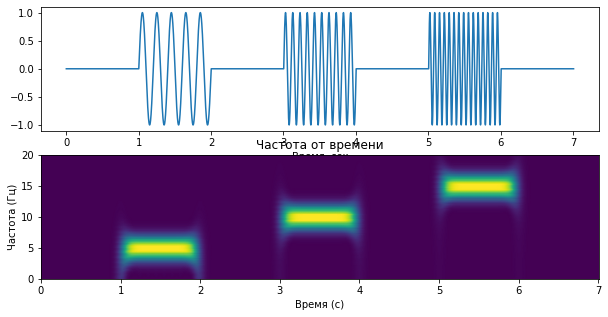

In [126]:
fg, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
ax1.plot(t, signal1)
ax1.set_xlabel('Время, сек')

ax2.pcolormesh(t,frex,tf)
ax2.set_xlabel('Время (с)'), ax2.set_ylabel('Частота (Гц)')
ax2.set_title('Частота от времени')

# Вторая часть лабы

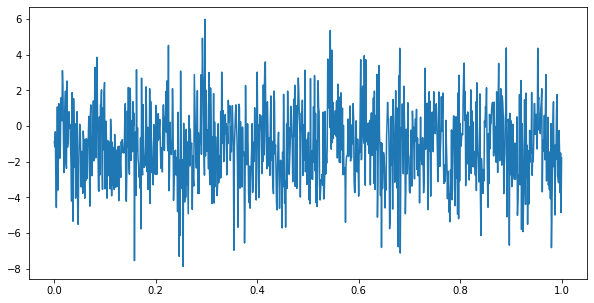

In [3]:
fs = 1000
n = 1001
t = np.arange(n)/fs
hz = np.linspace(0,fs/2,n//2+1)

freq = 15
sin = np.sin(2 * np.pi * freq * t)
noise = np.random.randn(n) - 0.5
signal2 = sin + 2 * noise

plt.plot(t, signal2)

In [4]:
fwhm  = .1
wavtime = np.arange(-3,3,1/fs)
morlet_wav = np.cos(2*np.pi*freq*wavtime) * np.exp( -(4*np.log(2)*wavtime**2) / fwhm**2 )

s=0.014
mhat_wav = (2/(np.sqrt(3*s)*np.pi**.25)) * (1- (wavtime**2)/(s**2) ) * np.exp( (-wavtime**2)/(2*s**2) )

In [5]:
nconv = len(t) + len(wavtime) - 1
halfw = len(wavtime) // 2
dataX = scipy.fftpack.fft(signal2,nconv)

morletX = scipy.fftpack.fft(morlet_wav,nconv)
morletX = morletX/np.max(morletX)
convres_morlet = np.real(np.fft.ifft(dataX * morletX))
convres_morlet = convres_morlet[halfw:-halfw + 1]

mhatX = scipy.fftpack.fft(mhat_wav,nconv)
mhatX = mhatX/np.max(mhatX)
convres_mhat = np.real(np.fft.ifft(dataX * mhatX))
convres_mhat = convres_mhat[halfw:-halfw + 1]

(0.0, 30.0)

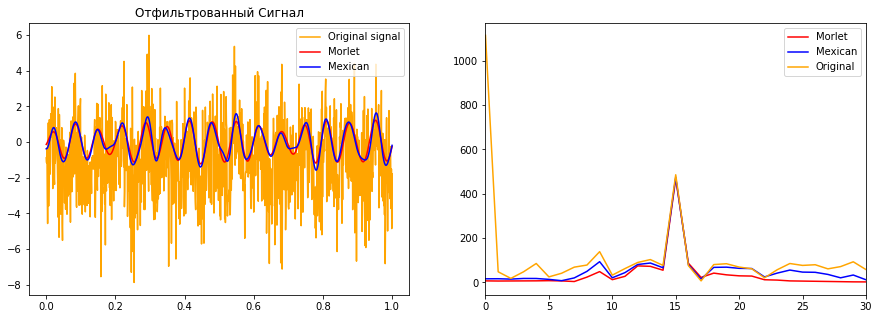

In [12]:
fg, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title("Отфильтрованный Сигнал")
ax1.plot(t, signal2, color='orange', label="Original signal")
ax1.plot(t,convres_morlet,'red', label="Morlet")
ax1.plot(t,convres_mhat,'blue', label="Mexican")
ax1.legend(loc='best')

ax2.plot(hz, np.abs(np.fft.fft(convres_morlet)[:hz.size]),'red', label="Morlet")
ax2.plot(hz, np.abs(np.fft.fft(convres_mhat)[:hz.size]),'blue', label="Mexican")
ax2.plot(hz, np.abs(np.fft.fft(signal2)[:hz.size]), 'orange', label='Original')
ax2.legend(loc='best')
ax2.set_xlim([0,freq*2])